In [1]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
root_file_dir= '~/Desktop/ROOT_files/'
file1= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root:recTree;29')
file2= uproot.open(root_file_dir + 'flat_caf_1-1637ea75-449f-467f-abd7-9e2f4f9710a7.root:recTree;31')
file3= uproot.open(root_file_dir + 'flat_caf_2-16432aaf-a139-4cb0-8c09-26f5af8c457f.root:recTree;31')
file4= uproot.open(root_file_dir + 'flat_caf_3-1ffa5d5d-a703-4c89-be04-dd5e6d458981.root:recTree;31')
file5= uproot.open(root_file_dir + 'flat_caf_4-d0f08994-a5a3-4420-8600-616832f5adbb.root:recTree;31')

In [53]:
file1.keys(filter_name='*')

['rec.crt_hits..length',
 'rec.crt_hits.pe',
 'rec.crt_hits.plane',
 'rec.crt_hits.position.x',
 'rec.crt_hits.position.y',
 'rec.crt_hits.position.z',
 'rec.crt_hits.position_err.x',
 'rec.crt_hits.position_err.y',
 'rec.crt_hits.position_err.z',
 'rec.crt_hits.t0',
 'rec.crt_hits.t1',
 'rec.crt_hits.time',
 'rec.crt_tracks..length',
 'rec.crt_tracks.hita.pe',
 'rec.crt_tracks.hita.plane',
 'rec.crt_tracks.hita.position.x',
 'rec.crt_tracks.hita.position.y',
 'rec.crt_tracks.hita.position.z',
 'rec.crt_tracks.hita.position_err.x',
 'rec.crt_tracks.hita.position_err.y',
 'rec.crt_tracks.hita.position_err.z',
 'rec.crt_tracks.hita.t0',
 'rec.crt_tracks.hita.t1',
 'rec.crt_tracks.hita.time',
 'rec.crt_tracks.hitb.pe',
 'rec.crt_tracks.hitb.plane',
 'rec.crt_tracks.hitb.position.x',
 'rec.crt_tracks.hitb.position.y',
 'rec.crt_tracks.hitb.position.z',
 'rec.crt_tracks.hitb.position_err.x',
 'rec.crt_tracks.hitb.position_err.y',
 'rec.crt_tracks.hitb.position_err.z',
 'rec.crt_tracks.hitb.

The ratio of Data/Mc is 1.3200671797669925


<Figure size 640x480 with 0 Axes>

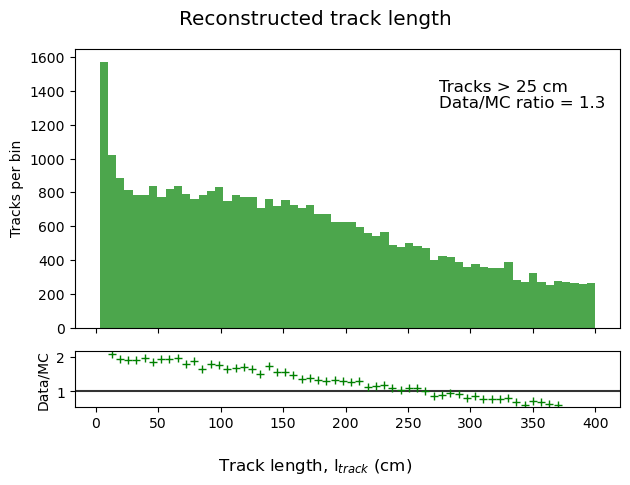

In [51]:
truth_length= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_length= ak.flatten(file1['rec.reco.trk.len'].array()).to_numpy()

truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_length= np.delete(reco_length, np.where((reco_length<3) | (reco_length>400)))

h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
x_axis= bins[:-1]+bins[0]
# h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_length[1:], bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('Reconstructed track length', size= 'x-large')
fig.supxlabel(r'Track length, l$_{track}$ (cm)')
ax1.set_ylabel('Tracks per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(275, 1400, 'Tracks > 25 cm', family='sans-serif', size= 'large')
ax1.text(275,1300, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 0.27740548192661546


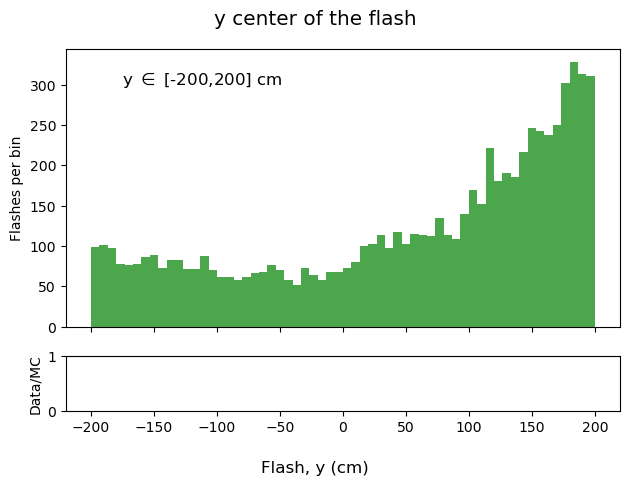

In [65]:
# truth_flashy= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_flashy= ak.flatten(file1['rec.slc.fmatch.chargeCenter.y'].array()).to_numpy()

# truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_flashy= np.delete(reco_flashy, np.where((reco_flashy<-200) | (reco_flashy>200)))

# h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
# x_axis= bins[:-1]+bins[0]
# h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
# plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_flashy, bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
# ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('y center of the flash', size= 'x-large')
fig.supxlabel(r'Flash, y (cm)')
ax1.set_ylabel('Flashes per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(-175, 300, r'y $\in$ [-200,200] cm', family='sans-serif', size= 'large')
# ax1.text(-175,250, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 0.27423404652861083


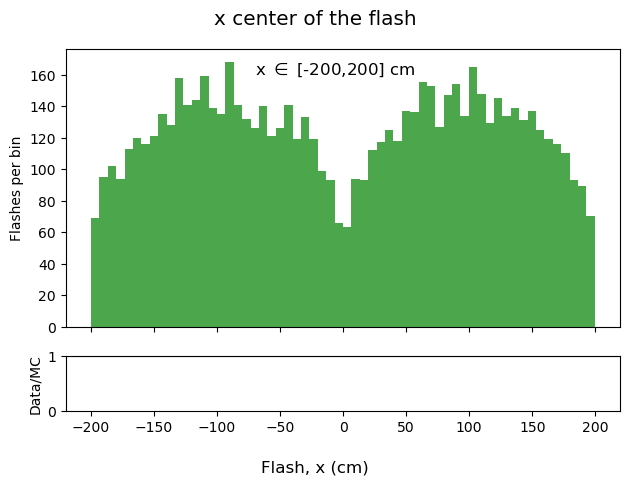

In [73]:
# truth_flashy= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_flashy= ak.flatten(file1['rec.slc.fmatch.chargeCenter.x'].array()).to_numpy()

# truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_flashy= np.delete(reco_flashy, np.where((reco_flashy<-200) | (reco_flashy>200)))

# h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
# x_axis= bins[:-1]+bins[0]
# h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
# plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_flashy, bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
# ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('x center of the flash', size= 'x-large')
fig.supxlabel(r'Flash, x (cm)')
ax1.set_ylabel('Flashes per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(-70, 160, r'x $\in$ [-200,200] cm', family='sans-serif', size= 'large')
# ax1.text(-175,250, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')

The ratio of Data/Mc is 0.27233751634997233


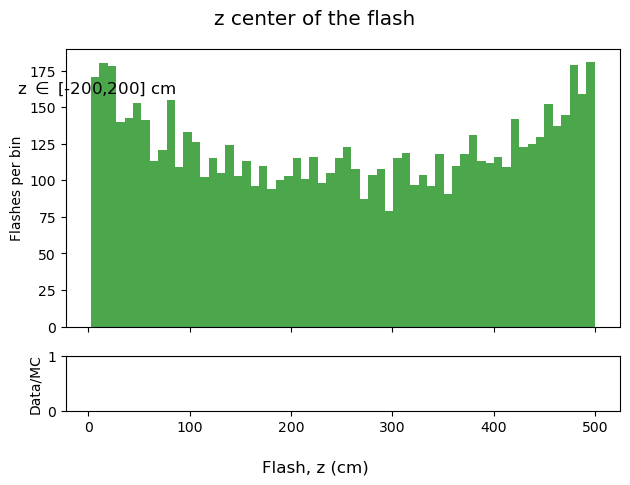

In [74]:
# truth_flashy= ak.flatten(file1['rec.reco.trk.truth.p.length'].array()).to_numpy()
reco_flashy= ak.flatten(file1['rec.slc.fmatch.chargeCenter.z'].array()).to_numpy()

# truth_length= np.delete(truth_length, np.where((truth_length<3) | (truth_length>400)))
reco_flashy= np.delete(reco_flashy, np.where((reco_flashy<0) | (reco_flashy>500)))

# h_truth,bins,_= plt.hist(truth_length, bins=60, color='r', alpha=0.3)
# x_axis= bins[:-1]+bins[0]
# h_reco,_,_= plt.hist(reco_length, bins=60, color= 'g', alpha=0.3)
# plt.clf()
fig, (ax1,ax2)= plt.subplots(2,1, sharex= True, gridspec_kw={'height_ratios': [5, 1]})
h_reco,_,_= ax1.hist(reco_flashy, bins=60, color= 'g', alpha= 0.7)
ax2.axhline(1, alpha= 0.8, c='k')
# ax2.errorbar(x_axis[1:-4], (h_reco/h_truth)[1:-4], fmt= 'g+')
fig.suptitle('z center of the flash', size= 'x-large')
fig.supxlabel(r'Flash, z (cm)')
ax1.set_ylabel('Flashes per bin')
ax2.set_ylabel('Data/MC')
fig.tight_layout()
ax1.text(-70, 160, r'z $\in$ [-200,200] cm', family='sans-serif', size= 'large')
# ax1.text(-175,250, f'Data/MC ratio = {np.average(h_reco/h_truth):.2}', family='sans-serif', size= 'large')
print(f'The ratio of Data/Mc is {np.average(h_reco/h_truth)}')